In [30]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Baixar dados do mercado (Exemplo: AAPL)
df = yf.download('AAPL', period='5d', interval='1m')

# A coluna 'Close' será usada como o preço, e 'Volume' como o volume negociado
df = df[['Close', 'Volume']].rename(columns={'Close': 'price', 'Volume': 'volume'})

# Definir o limite para a Dollar Bar (Exemplo: $5.000)
dollar_bar_threshold = 50000000  # 5 milhões para acomodar o volume e preço da AAPL

# Inicializar variáveis
current_dollar_value = 0
bars = []
open_price = None
high_price = -float('inf')
low_price = float('inf')
close_price = None
cumulative_volume = 0

# Iterar sobre cada transação no DataFrame
for idx, row in df.iterrows():
    price = row['price']
    volume = row['volume']
    
    dollar_value = price * volume
    
    # Definir preço de abertura na primeira transação da barra
    if current_dollar_value == 0:
        open_price = price

    # Atualizar o valor acumulado em dólares e volume
    current_dollar_value += dollar_value
    cumulative_volume += volume
    
    # Atualizar o preço alto e baixo
    high_price = max(high_price, price)
    low_price = min(low_price, price)
    
    # O preço de fechamento será o da última transação antes da barra ser concluída
    close_price = price
    
    # Verificar se o limite da Dollar Bar foi atingido
    if current_dollar_value >= dollar_bar_threshold:
        # Criar uma nova barra com as informações acumuladas
        bar = {
            'open': open_price,
            'high': high_price,
            'low': low_price,
            'close': close_price,
            'volume': cumulative_volume,
            'dollar_value': current_dollar_value,
            'timestamp': idx  # Usando o índice do DataFrame como timestamp
        }
        bars.append(bar)
        
        # Reiniciar variáveis para a próxima barra
        current_dollar_value = 0
        high_price = -float('inf')
        low_price = float('inf')
        cumulative_volume = 0

# Converter as barras para DataFrame
bars_df = pd.DataFrame(bars)


print(bars_df)


[*********************100%%**********************]  1 of 1 completed

           open        high         low       close     volume  dollar_value  \
0    228.238495  228.238495  228.238495  228.238495  2279570.0  5.202856e+08   
1    228.809998  228.809998  228.809998  228.809998   312123.0  7.141686e+07   
2    228.320007  228.320007  227.445694  227.445694   479953.0  1.093143e+08   
3    227.050003  227.050003  227.050003  227.050003   311693.0  7.076990e+07   
4    226.740005  226.740005  226.740005  226.740005   239776.0  5.436681e+07   
..          ...         ...         ...         ...        ...           ...   
546  220.630005  220.630005  220.389999  220.619797   257264.0  5.673720e+07   
547  220.809998  220.809998  220.790100  220.790100   238734.0  5.271272e+07   
548  220.890106  220.890106  220.666000  220.666000   236298.0  5.218005e+07   
549  220.585007  220.735001  220.585007  220.639999   254274.0  5.610707e+07   
550  220.759995  220.839996  220.640594  220.839996   273015.0  6.027385e+07   

                    timestamp  
0   202

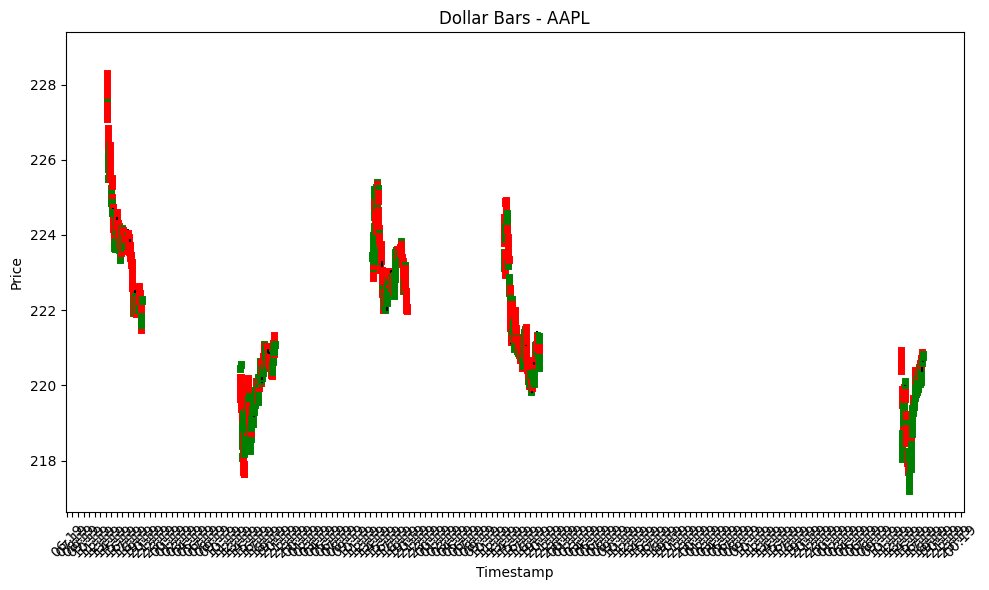

In [31]:
# Plotar as Dollar Bars usando o formato Candlestick
fig, ax = plt.subplots(figsize=(10, 6))

# Plotar cada barra individualmente
for idx, bar in bars_df.iterrows():
    color = 'green' if bar['close'] >= bar['open'] else 'red'
    ax.plot([bar['timestamp'], bar['timestamp']], [bar['low'], bar['high']], color='black')  # High-low line
    ax.plot([bar['timestamp'], bar['timestamp']], [bar['open'], bar['close']], color=color, linewidth=5)  # Open-close bar

# Formatando o gráfico
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=60))
ax.set_xlabel('Timestamp')
ax.set_ylabel('Price')
ax.set_title('Dollar Bars - AAPL')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()